In [1]:
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import category_encoders as ce

In [2]:
df=pd.read_csv("AB_NYC_2019.csv")

# EDA & pre-processing

In [3]:
df.shape

(48895, 15)

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


**Remove columns**

In [5]:
df.drop(["reviews_per_month","longitude","latitude","host_name","name","host_id","id"],axis=1,inplace=True)

**Check for null values**

In [6]:
null_sum=df.isnull().sum()
null_ratio=df.isnull().sum()/df.shape[0]
pd.DataFrame([null_sum,null_ratio],index=["null_sum","null_ratio"])

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
null_sum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
null_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Change location of price to the last columns**

In [7]:
columns=df.columns.tolist()
columns.append(columns.pop(3))
df=df[columns]
df.head(10)

,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,price
0,Brooklyn,Kensington,Private room,1,9,6,365,149
1,Manhattan,Midtown,Entire home/apt,1,45,2,355,225
2,Manhattan,Harlem,Private room,3,0,1,365,150
3,Brooklyn,Clinton Hill,Entire home/apt,1,270,1,194,89
4,Manhattan,East Harlem,Entire home/apt,10,9,1,0,80
5,Manhattan,Murray Hill,Entire home/apt,3,74,1,129,200
6,Brooklyn,Bedford-Stuyvesant,Private room,45,49,1,0,60
7,Manhattan,Hell's Kitchen,Private room,2,430,1,220,79
8,Manhattan,Upper West Side,Private room,2,118,1,0,79
9,Manhattan,Chinatown,Entire home/apt,1,160,4,188,150


**Check for unique values**

In [8]:
pd.DataFrame([df.nunique(),df.dtypes], index=["num_unique","dtype"])

,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,price
num_unique,5,221,3,109,394,47,366,674
dtype,object,object,object,int64,int64,int64,int64,int64


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   neighbourhood_group             48895 non-null  object
 1   neighbourhood                   48895 non-null  object
 2   room_type                       48895 non-null  object
 3   minimum_nights                  48895 non-null  int64 
 4   number_of_reviews               48895 non-null  int64 
 5   calculated_host_listings_count  48895 non-null  int64 
 6   availability_365                48895 non-null  int64 
 7   price                           48895 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 3.0+ MB


**Reprsent some columns as categorical**

In [10]:
col=['neighbourhood_group','neighbourhood','room_type']
df[col]=df[col].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   neighbourhood_group             48895 non-null  category
 1   neighbourhood                   48895 non-null  category
 2   room_type                       48895 non-null  category
 3   minimum_nights                  48895 non-null  int64   
 4   number_of_reviews               48895 non-null  int64   
 5   calculated_host_listings_count  48895 non-null  int64   
 6   availability_365                48895 non-null  int64   
 7   price                           48895 non-null  int64   
dtypes: category(3), int64(5)
memory usage: 2.1 MB


**Check for duplicated**

In [11]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

## 4. Statistics about Data

In [12]:
df.describe()

,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,price
count,47227.000000,47227.000000,47227.000000,47227.000000,47227.000000
mean,7.113600,24.056641,7.143054,115.443348,153.674212
std,20.809134,45.130135,33.127747,131.655610,243.287669
min,1.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,70.000000
50%,3.000000,6.000000,1.000000,52.000000,109.000000
75%,5.000000,25.000000,2.000000,233.000000,177.000000
max,1250.000000,629.000000,327.000000,365.000000,10000.000000


In [13]:
df.describe(include=["category"])

,neighbourhood_group,neighbourhood,room_type
count,47227,47227,47227
unique,5,221,3
top,Manhattan,Williamsburg,Entire home/apt
freq,20964,3570,24783


In [14]:
df.iloc

**Visualization**

In [15]:
numeric_df=df.select_dtypes('number')
numeric_df

,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,price
0,1,9,6,365,149
1,1,45,2,355,225
2,3,0,1,365,150
3,1,270,1,194,89
4,10,9,1,0,80
...,...,...,...,...,...
48890,2,0,2,9,70
48891,4,0,2,36,40
48892,10,0,1,27,115
48893,1,0,6,2,55


<function matplotlib.pyplot.show(close=None, block=None)>

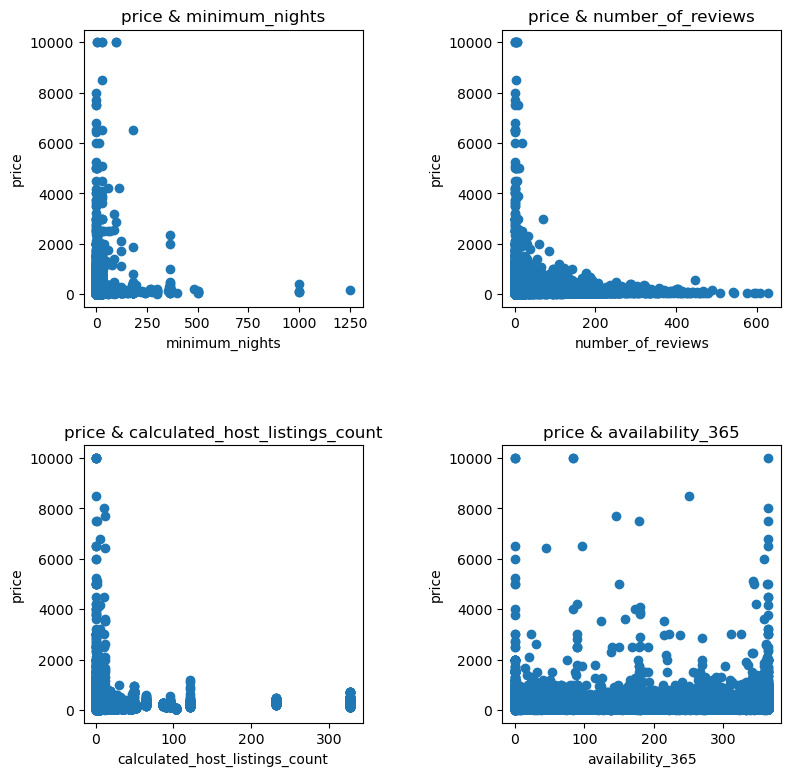

In [16]:
plt.figure(figsize=(9,9))
for i, col in enumerate (numeric_df.columns[:-1]):
    plt.subplot(2,2,i+1)
    plt.scatter(df[col],df["price"])
    plt.ylabel("price")
    plt.xlabel(col)
    plt.title(f"price & {col}")
plt.subplots_adjust(wspace=.5,hspace=.5)
plt.show


In [17]:
corr=numeric_df.corr()
corr

,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,price
minimum_nights,1.000000,-0.082700,0.122787,0.136638,0.040842
number_of_reviews,-0.082700,1.000000,-0.073470,0.165592,-0.050365
calculated_host_listings_count,0.122787,-0.073470,1.000000,0.218152,0.055230
availability_365,0.136638,0.165592,0.218152,1.000000,0.077244
price,0.040842,-0.050365,0.055230,0.077244,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

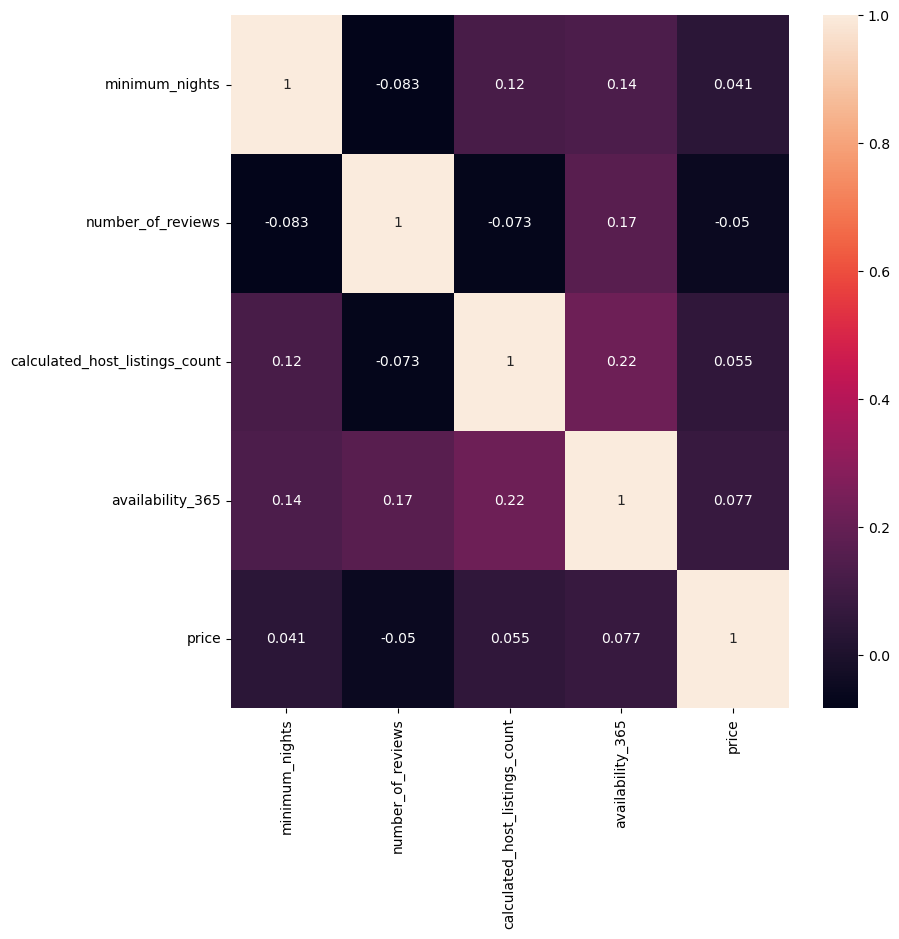

In [18]:
plt.figure(figsize=(9,9))
sns.heatmap(corr,annot=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

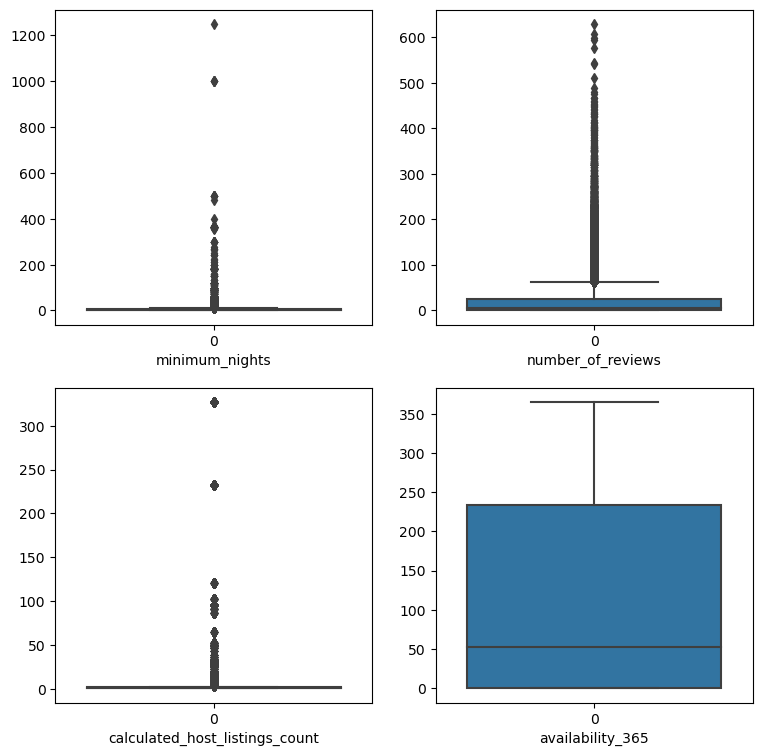

In [19]:
plt.figure(figsize=(9,9))
for i , col in enumerate (numeric_df.columns[:-1]):
    plt.subplot(2,2,i+1)
    sns.boxplot(df[col])
    plt.xlabel(col)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

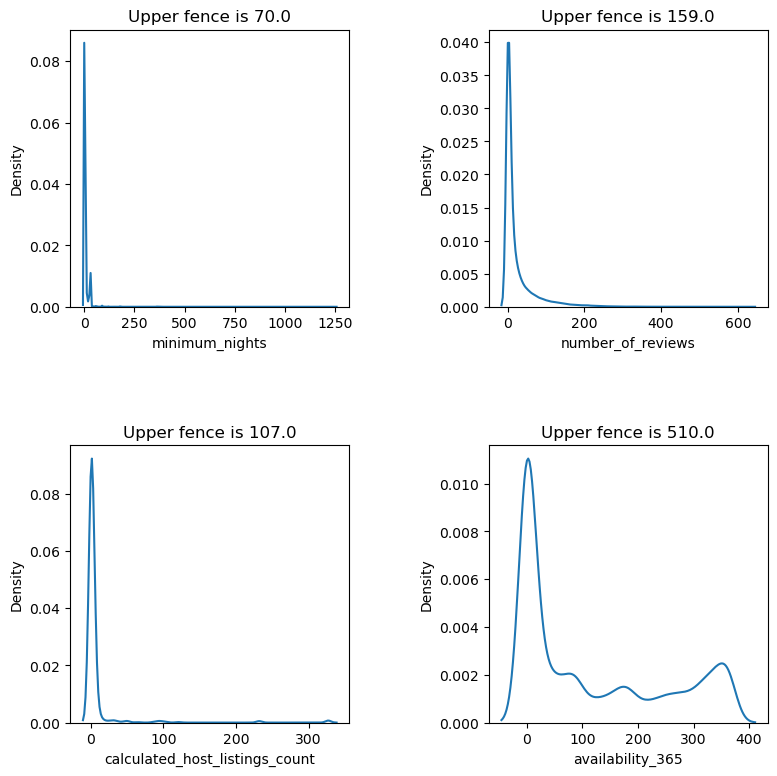

In [20]:
plt.figure(figsize=(9,9))
for i, col in enumerate (numeric_df.columns[:-1]):
    plt.subplot(2,2,i+1)
    sns.kdeplot(df[col])
    m=df[col].mean()
    s=df[col].std()
    upper_fence=m+3*s
    plt.title(f"Upper fence is {np.round(upper_fence)}")
plt.subplots_adjust(wspace=.5,hspace=.5)
plt.show

In [21]:
for col in numeric_df.columns[:-1]:
    Q3 = df[col].quantile(.75) 
    Q1 = df[col].quantile(.25)
    IQR = Q3 - Q1
    upper_fence = Q3 + 1.5*IQR
    
    r = 1 - (df[df[col] <= np.round(upper_fence)].shape[0] / df.shape[0])
    
    ind = df[df[col] > np.round(upper_fence)].index
    df.loc[ind, col:col] = np.round(upper_fence)
    
    print(f"Upper fence of {col} is: {upper_fence}")
    print(f"Ration of Outliers {r}")
    print(df[col].max())
    print("------------")

Upper fence of minimum_nights is: 11.0
Ration of Outliers 0.1364685455353929
11
------------
Upper fence of number_of_reviews is: 61.0
Ration of Outliers 0.12067249666504332
61
------------
Upper fence of calculated_host_listings_count is: 3.5
Ration of Outliers 0.11533656594744535
4
------------
Upper fence of availability_365 is: 582.5
Ration of Outliers 0.0
365
------------


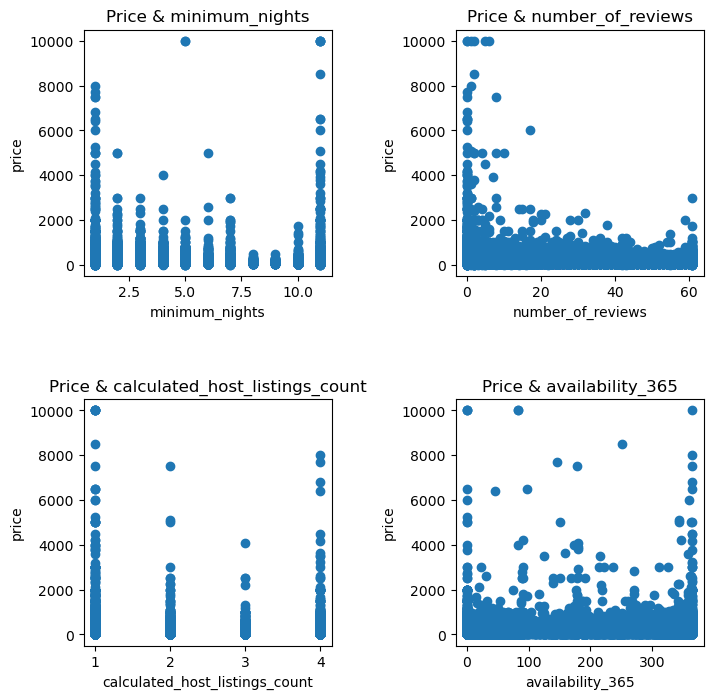

In [22]:
plt.figure(figsize=(8,8))
for i, col in enumerate(numeric_df.columns[:-1]):
    plt.subplot(2, 2, i+1)
    plt.scatter(df[col], df["price"])
    plt.ylabel("price")
    plt.xlabel(col)
    plt.title(f"Price & {col}")
plt.subplots_adjust(wspace=.5, hspace=.5)
plt.show()

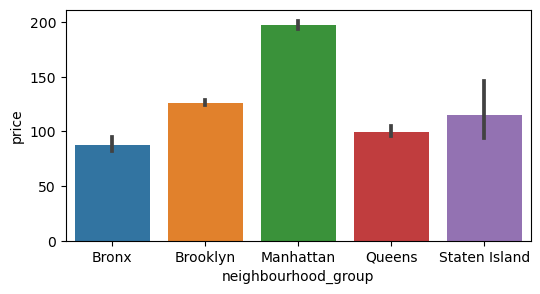

In [23]:
plt.figure(figsize=(6,3))
sns.barplot(y='price',x='neighbourhood_group',data=df)
plt.show()

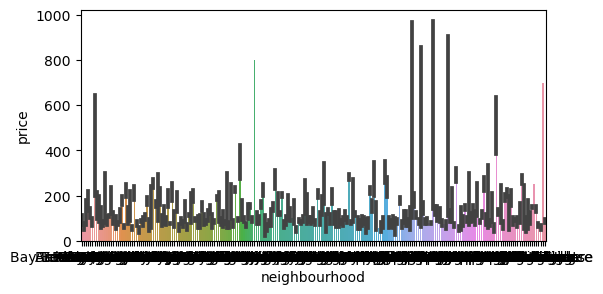

In [24]:
plt.figure(figsize=(6,3))
sns.barplot(y='price',x='neighbourhood',data=df)
plt.show()

In [25]:
agg = df.groupby("neighbourhood")
mean_df = agg.mean()
mean_df = mean_df.sort_values("price").tail(5)
mean_df = mean_df.reset_index()
mean_df

,neighbourhood,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,price
0,Riverdale,3.636364,12.181818,1.545455,160.818182,442.090909
1,Sea Gate,4.142857,1.428571,1.857143,65.571429,487.857143
2,Tribeca,5.409091,8.414773,1.795455,127.227273,490.585227
3,Woodrow,7.000000,0.000000,1.000000,0.000000,700.000000
4,Fort Wadsworth,7.000000,0.000000,3.000000,365.000000,800.000000


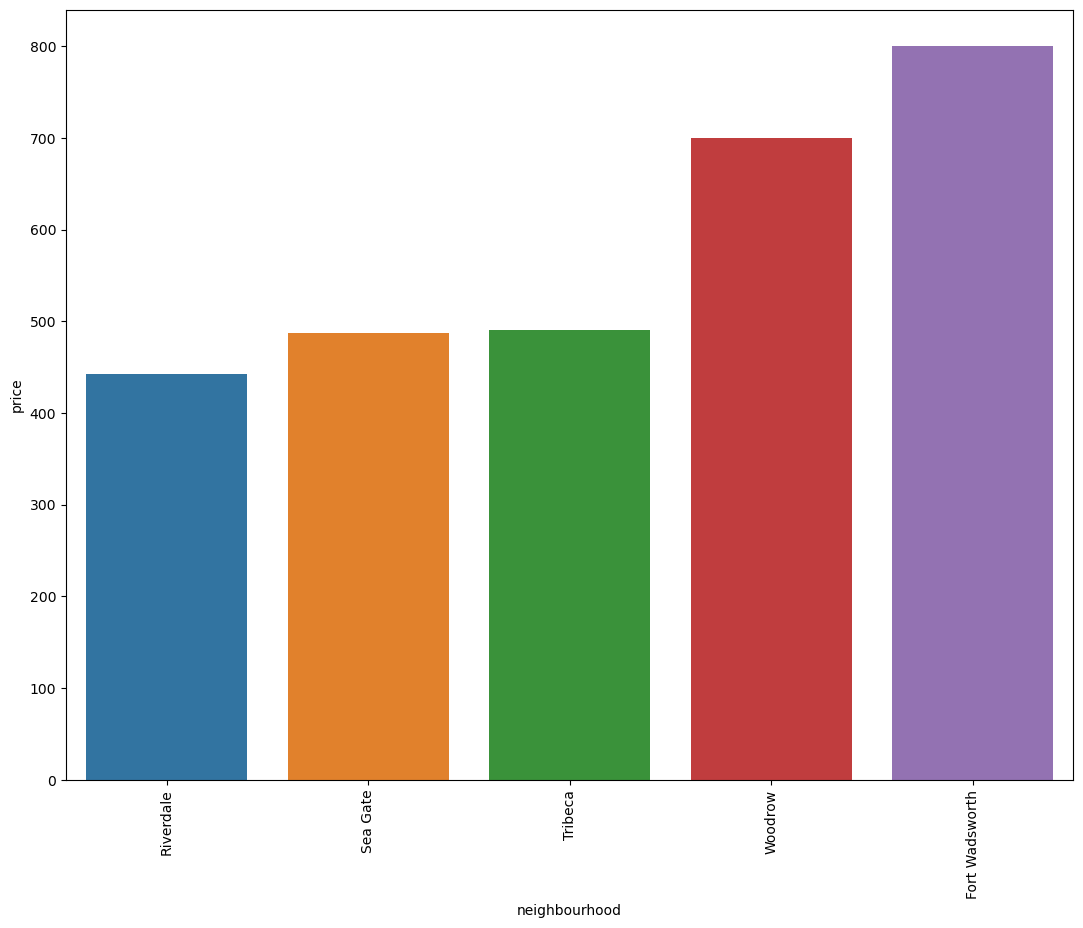

In [26]:
plt.figure(figsize=(13, 10))
mean_df = pd.DataFrame(mean_df.values, columns = mean_df.columns.to_list())
sns.barplot(x='neighbourhood', y='price', data=mean_df)

"""or 
sns.barplot(x='neighbourhood', y='price', data=mean_df, order=mean_df['neighbourhood'])
"""

plt.xticks(rotation=90)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

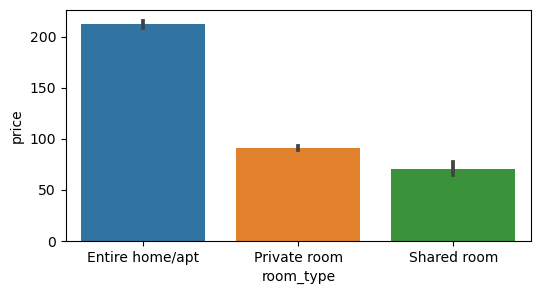

In [27]:
plt.figure(figsize=(6,3))
sns.barplot(y='price',x='room_type',data=df)
plt.show

## 6. Feature Engineering 

In [28]:
location = df.apply(lambda x: x.neighbourhood_group + "_" + x.neighbourhood, axis=1)
df.insert(0, "Location", location)

In [29]:
#df

**Drop columns After Feature engineering**

In [30]:
df.drop(['neighbourhood_group','neighbourhood'],axis=1,inplace=True)


# Split Data

In [31]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1:]

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# 8. Normalization


In [33]:
from sklearn.preprocessing import MinMaxScaler
numeric_cols = x_train.select_dtypes("number").columns
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

x_train[numeric_cols] = x_scaler.fit_transform(x_train[numeric_cols])
y_train[["price"]] = y_scaler.fit_transform(y_train[["price"]])

x_test[numeric_cols] = x_scaler.transform(x_test[numeric_cols])
y_test[["price"]] = y_scaler.transform(y_test[["price"]])

# 9. Encoding

In [34]:
# label encoding
#from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()

# categorical_columns = ['room_type']

# for column in categorical_columns:
#     df[column] = label_encoder.fit_transform(df[column])
#     df[column] = df[column].astype('category')
# df
# one hot encoding
x_train =pd.get_dummies(x_train,columns=['room_type'])
x_test =pd.get_dummies(x_test,columns=['room_type'])

In [35]:
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=["Location"])
x_train = encoder.fit_transform(x_train)
x_test = encoder.fit_transform(x_test)
x_train.head()

,Location_0,Location_1,Location_2,Location_3,Location_4,Location_5,Location_6,Location_7,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
28706,0,0,0,0,0,0,0,1,0.6,0.000000,0.0,0.000000,1,0,0
42281,0,0,0,0,0,0,1,0,0.1,0.327869,0.0,0.813699,1,0,0
8227,0,0,0,0,0,0,1,1,0.1,0.032787,0.0,0.000000,1,0,0
43513,0,0,0,0,0,1,0,0,0.0,0.131148,1.0,0.950685,0,0,1
16195,0,0,0,0,0,1,0,1,0.2,0.032787,0.0,0.213699,1,0,0


# ML

**Build & Train Model**

In [36]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

**Predict**

In [37]:
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)

**Evaluation**

In [38]:
y_train=y_scaler.inverse_transform(y_train)
y_test=y_scaler.inverse_transform(y_test)

y_pred_train=y_scaler.inverse_transform(y_pred_train)
y_pred_test=y_scaler.inverse_transform(y_pred_test)

In [39]:
training_err = np.round(mean_absolute_error(y_train, y_pred_train))
test_err = np.round(mean_absolute_error(y_test, y_pred_test))
print(test_err)
print(training_err)

82.0
75.0


In [40]:
train_acc = (abs(y_pred_train - y_train) < 10).sum() / y_train.shape[0] * 100 
test_acc = (abs(y_pred_test - y_test) < 10).sum() / y_test.shape[0] * 100 
print(train_acc)
print(test_acc)

11.51001833006763
10.42027590632018
